# Chapter5: ネットワーク計画

In [10]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

## 5.1
(問) 図5.7のグラフにおいて$s$から$t$への最適路を求めよ.

In [11]:
# define graph
graph_5_7 = """1 2 20
1 4 58
1 3 40
2 5 51
2 4 30
3 6 16
3 7 17
4 5 18
4 6 7
4 7 6
5 8 11
6 7 4
6 8 25
7 8 24"""

G_5_7 = [[] for _ in range(7)]
for input in graph_5_7.split('\n'):
    v, u, w = map(int, input.split())
    v -= 1
    u -= 1
    G_5_7[v].append([u, w])
G_5_7

[[[1, 20], [3, 58], [2, 40]],
 [[4, 51], [3, 30]],
 [[5, 16], [6, 17]],
 [[4, 18], [5, 7], [6, 6]],
 [[7, 11]],
 [[6, 4], [7, 25]],
 [[7, 24]]]

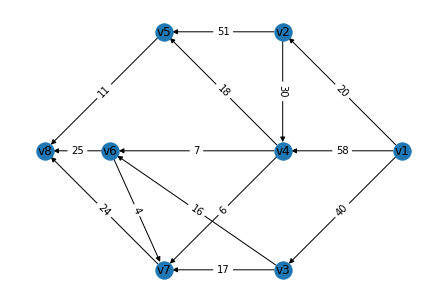

In [12]:
# read by nx
G = nx.DiGraph()
for v, dest in enumerate(G_5_7):
    G.add_node(v, label = f'v{v+1}')
    for u, w in dest:
        G.add_edge(v, u, weight = w)

G.add_node(7, label = 'v8')

# add layer to visualize like text
nx.set_node_attributes(G, dict(zip(range(8), [1, 2, 0, 1, 2, 1, 0, 1])), 'layer')

node_number = nx.get_node_attributes(G, 'label')
edge_weights = nx.get_edge_attributes(G, 'weight')
pos = nx.multipartite_layout(G, subset_key='layer', align='horizontal')
pos[5] -= np.array([0.3 , 0])
nx.draw(G, pos)
nx.draw_networkx_labels(G, pos, node_number)
nx.draw_networkx_edge_labels(G, pos, edge_weights)
plt.show()

In [13]:
# solve by nx
shortest_path = nx.dijkstra_path(G, 0, 7)
'v' + ' -> v'.join(map(lambda x: str(x+1), shortest_path))

'v1 -> v2 -> v4 -> v5 -> v8'

## 5.2
(問) 最小木問題の解法としてクラスカルのアルゴリズムの正当性を示せ. また, プリムのアルゴリズムの正当性を示せ.

(答) Thank you drken!! https://drken1215.hatenablog.com/entry/20121223/1356230697

## 5.3
(問) 連結な重み付き無向グラフ$G=(V, E, c)$の全域木のうち, 重みがk番目に小さいものを第k最小全域木と呼ぶ. 定義より, 第1最小全域木は最小木である. 第2最小全域木を求めるアルゴリズムを考えよ.

(答) 最小全域木を構成し, その中から1本を選んで取り除いたうえでもとのグラフから最小全域木を構成する. 以上の操作を最初の最小全域木のすべての辺に対して行い, 最も小さいものが第2最小全域木となる.

## 5.4
(問) データ点 $s_1,..., s_5$ があり, 各点間の距離が図5.23のように与えられている. このとき, 単リンク法によるクラスタリングを行い, デンドログラムを書け.

In [14]:
# define graph
graph_5_23 = """1 2 8
1 3 3
1 4 6
1 5 1
2 3 7
2 4 10
2 5 9
3 4 5
3 5 4
4 5 2"""

G_5_23 = [[] for _ in range(5)]
for input in graph_5_23.split('\n'):
    v, u, w = map(int, input.split())
    v -= 1
    u -= 1
    G_5_23[v].append([u, w])
    G_5_23[u].append([v, w])

G_5_23

[[[1, 8], [2, 3], [3, 6], [4, 1]],
 [[0, 8], [2, 7], [3, 10], [4, 9]],
 [[0, 3], [1, 7], [3, 5], [4, 4]],
 [[0, 6], [1, 10], [2, 5], [4, 2]],
 [[0, 1], [1, 9], [2, 4], [3, 2]]]

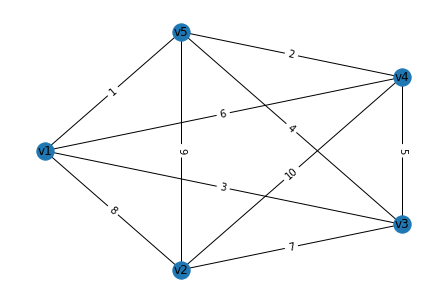

In [15]:
# read by nx
G = nx.Graph()
for v, dest in enumerate(G_5_23):
    G.add_node(v, label=f'v{v+1}')
    for u, w in dest:
        G.add_edge(v, u, weight = w)

edge_weights = nx.get_edge_attributes(G,'weight')
node_number = nx.get_node_attributes(G,'label')
pos = nx.shell_layout(G)
nx.draw(G, pos)
nx.draw_networkx_labels(G, pos, node_number)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_weights)
plt.show()

condensed distance matrix: [8, 3, 6, 1, 7, 10, 9, 5, 4, 2]


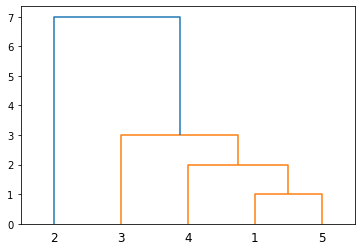

In [16]:
# solve by scipy.cluster.hierarchy
distnace_1D = [edge_weights[i] for i in sorted(edge_weights.keys())]
print('condensed distance matrix:', distnace_1D)
Z = linkage(distnace_1D, method = 'single')
dendrogram(Z, labels=range(1, 6))
plt.show()

## 5.5
(問) 最小費用流問題を利用することで輸送問題(1.1節の例1.2)を解く方法を考えよ.

(答) ネットワークを構成し, capacityの制約無しで最小費用問題を解く.

{'S1': {'C1': 0.0, 'C2': 12.5, 'C3': 7.5},
 'S2': {'C1': 8.5, 'C2': 0, 'C3': 6.5},
 'C1': {},
 'C2': {},
 'C3': {}}

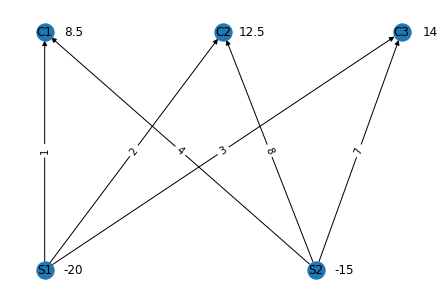

In [17]:
# define graph
G = nx.DiGraph()

G.add_node('S1', demand=-20)
G.add_node('S2', demand=-15)
G.add_node('C1', demand=8.5)
G.add_node('C2', demand=12.5)
G.add_node('C3', demand=14)

G.add_edge('S1', 'C1', weight=1)
G.add_edge('S1', 'C2', weight=2)
G.add_edge('S1', 'C3', weight=3)
G.add_edge('S2', 'C1', weight=4)
G.add_edge('S2', 'C2', weight=8)
G.add_edge('S2', 'C3', weight=7)

# plot graph
demand = nx.get_node_attributes(G, 'demand')
cost = nx.get_edge_attributes(G, 'weight')
pos = nx.bipartite_layout(G, ['S1', 'S2'], align='horizontal')
pos['S2'] -= np.array([0.3 , 0])
nx.draw(G, pos, with_labels=True)
nx.draw_networkx_edge_labels(G, pos, cost)
nx.draw_networkx_labels(G, dict(zip(pos.keys(), [i + np.array([0.1, 0]) for i in pos.values()])), demand)
plt.plot()

# solve
nx.min_cost_flow(G)

## 5.6
(問) 2部グラフのマッチングのうちで辺の数が最大のものを求める問題を, 最大マッチング問題とよぶ. 最大流問題を利用することで最大マッチング問題を解く方法を考えよ.

(答) 2部グラフの一方の全てのノードとつながるノードをそれぞれに用意する. 各辺の重みを1として新しく作成したノード間の最大流問題の解が最大マッチング問題の解となる.